In [1]:
import torch, torchaudio

from models import LSTMClassifier, GRUClassifier, CNN_RNN
from datasets import SoundTracksDataset
from train import MultiClassTrainer
from data_visualisation import plot_spectrogram

In [2]:
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dset = SoundTracksDataset(train=True).to(device)
train_dset, val_dset = dset.train_test_split(0.2)
val_dset, test_dset = val_dset.train_test_split(0.5)

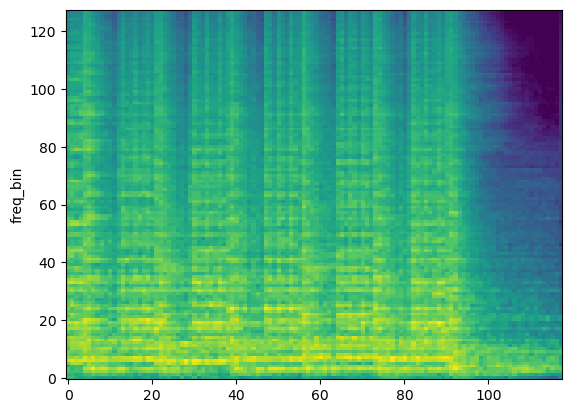

In [3]:
plot_spectrogram(train_dset.melspecs[0].cpu())

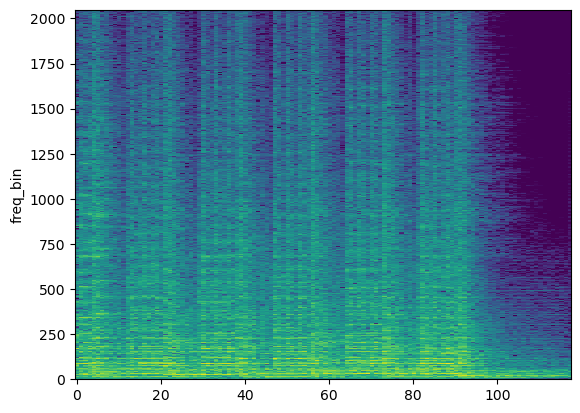

In [4]:
plot_spectrogram(train_dset.spectrograms[0].cpu(), to_db=True)

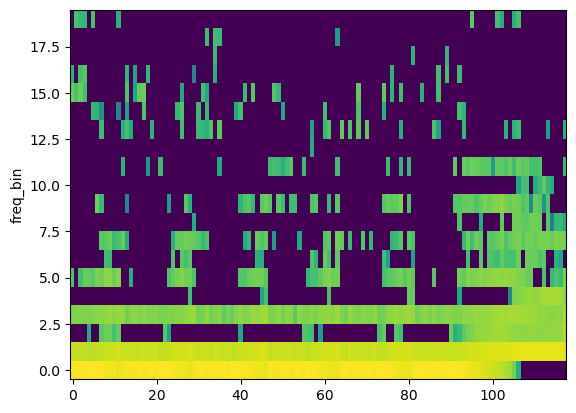

In [5]:
plot_spectrogram(train_dset.mfcc[0].cpu(), to_db=True)

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

torch.Size([170, 4])
Training start
Epoch 0    Train Loss=2.8638    Train Acc=0.2529    Val Loss=2.8837    Val Acc=0.2381
Epoch 1    Train Loss=2.8491    Train Acc=0.2529    Val Loss=2.8693    Val Acc=0.2381
Epoch 2    Train Loss=2.8337    Train Acc=0.2529    Val Loss=2.8542    Val Acc=0.2381
Epoch 3    Train Loss=2.8176    Train Acc=0.2529    Val Loss=2.8393    Val Acc=0.2381
Epoch 4    Train Loss=2.8014    Train Acc=0.2529    Val Loss=2.8248    Val Acc=0.2381
Epoch 5    Train Loss=2.7853    Train Acc=0.2529    Val Loss=2.8088    Val Acc=0.2381
Epoch 6    Train Loss=2.7692    Train Acc=0.2529    Val Loss=2.7930    Val Acc=0.2381
Epoch 7    Train Loss=2.7538    Train Acc=0.2529    Val Loss=2.7776    Val Acc=0.2381
Epoch 8    Train Loss=2.7380    Train Acc=0.2529    Val Loss=2.7640    Val Acc=0.2381
Epoch 9    Train Loss=2.7227    Train Acc=0.2529    Val Loss=2.7499    Val Acc=0.2381
Epoch 10    Train Loss=2.7075    Train Acc=0.2529    Val Loss=2.7350    Val Acc=0.2381
Epoch 11    Train

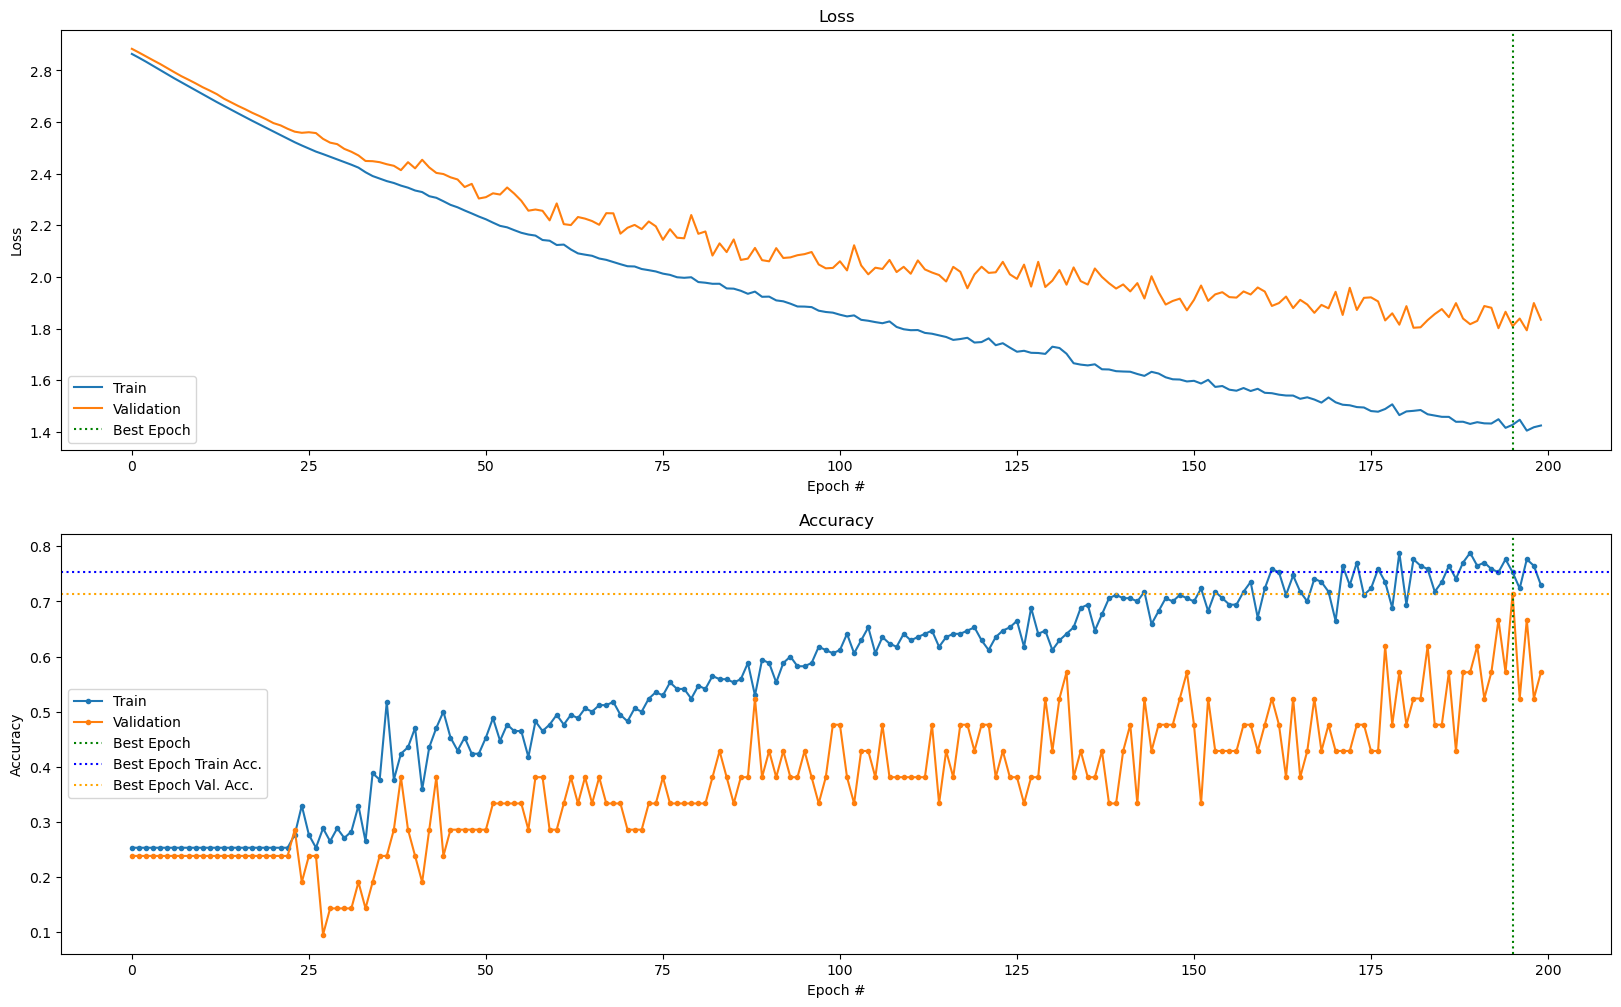

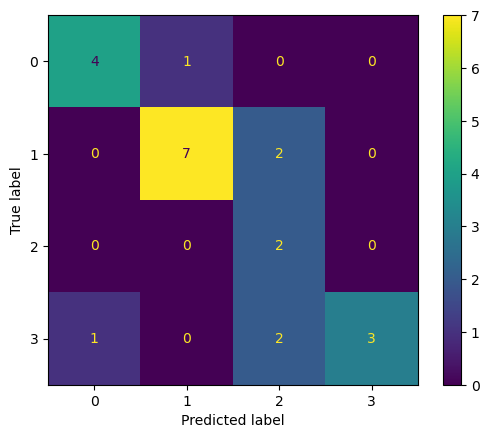

In [10]:
model13 = CNN_RNN(
    feature='melspecs',
    out_features=4,
    gru_args={
        'input_size': 16, 
        'hidden_size': 64, 
        'num_layers': 1,
        'bidirectional': True
    }
).to(device)

print(model13(train_dset.features).shape)

trainer = MultiClassTrainer(
    num_classes=4,
    device=device
)

bs = 8
epochs = 200
lam = 0.01
l1_ratio = 0.05
lr = 0.0001

trainer.train(model13, train_dset, val_dset,
              batch_size=bs, max_epochs=epochs, lambda_val=lam, l1_ratio=l1_ratio, lr=lr, take_best=True)

test_loss, test_acc, test_cm = trainer.evaluate_performance(model13, test_dset)
print(f'Test Loss={test_loss:.4f}    Test Acc={test_acc:.4f}')
ConfusionMatrixDisplay(test_cm.cpu().numpy()).plot()
plt.show()

In [11]:
model13

CNN_RNN(
  (cnn): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout2d(p=0.3, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): LeakyReLU(negative_slope=0.01)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.3, inplace=False)
    (8): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): LeakyReLU(negative_slope=0.01)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): GRUEncoder(
    (encoder): GRU(16, 64, batch_first=True, bidirectional=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout1d(p=0.3, inplace=False)
    (3): Linear(in_features=64, ou